# Avaliação A1

A aluno deverá escolher um modelo/Algoritmo de Machine Learning, visto em sala, e executar uma analise completa de uma base de dados. 

Deverá descrever os passos abaixo no Colab ou no Jupyter notebook:

1. Obtenção da base dados (feito no Scrapy ou outra ferramenta/base de dados)
2. Análise exploratória
3. Preparação dos Dados
4. Aplicação do modelo escolhido
5. Apresentação dos resultados

## Observações: 
- Só será aceito as avaliações dos alunos que compareceram a aula do dia 04 de novembro de 2021
- A avaliação é individual. Não será aceito mais de um aluno utilizando a mesma base de dados

## Detalhes
- **Dataset:** https://archive.ics.uci.edu/ml/datasets/zoo
- **Aluno:** Plínio Larrubia Ferreira de Moura

1. **animal name:** Unique for each instance
2. **hair:** Boolean
3. **feathers:** Boolean
4. **eggs:** Boolean
5. **milk:** Boolean
6. **airborne:** Boolean
7. **aquatic:** Boolean
8. **predator:** Boolean
9. **toothed:** Boolean
10. **backbone:** Boolean
11. **breathes:** Boolean
12. **venomous:** Boolean
13. **fins:** Boolean
14. **legs:** Numeric (set of values: {0,2,4,5,6,8})
15. **tail:** Boolean
16. **domestic:** Boolean
17. **catsize:** Boolean
18. **type:** Numeric (integer values in range [1,7])

# 1. Obtenção da base dados

## Importação das bibliotecas

In [36]:
!pip install numpy --upgrade
!pip install pandas --upgrade
!pip install plotly --upgrade
!pip install seaborn --upgrade
!pip install sklearn --upgrade

In [37]:
import matplotlib.pyplot as plt # Cálculos (Dependência do Seaborn)
import numpy as np              # Cálculos com tabelas
import pandas as pd             # Manipulação de Tabelas e Dados
import seaborn as sns           # Vizualização dos dados com gráficos
from sklearn.model_selection import train_test_split  # Separação dos dados em treinamento e teste
from sklearn.linear_model import LogisticRegression   # Aplicação do modelo da Regressão Logística
import sklearn.metrics as metrics                     # Vizualização dos dados de predição
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # Vizualização da precisão e predição com e sem normalização 
# from sklearn.metrics import plot_confusion_matrix # Biblioteca obsoleta, troquei por ConfusionMatrixDisplay

## Carregando Base de dados do Zoológico

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
header_list = [
               'Animal Name', 'Hair?', 'Feathers?', 'Eggs?', 'Milk?', 'Airborne?',
               'Aquatic?', 'Predator?', 'Toothed?', 'Backbone?', 'Breathes?', 'Venomous?',
               'Fins?', 'Legs', 'Tail?', 'Domestic?', 'Catsize?', 'Type'
              ]
zoo_data = pd.read_csv('data/zoo.data.csv',
                       usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], names=header_list)

## Lendo a base de dados

In [40]:
zoo_data.head(7)

,Animal Name,Hair?,Feathers?,Eggs?,Milk?,Airborne?,Aquatic?,Predator?,Toothed?,Backbone?,Breathes?,Venomous?,Fins?,Legs,Tail?,Domestic?,Catsize?,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [41]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Animal Name  101 non-null    object
 1   Hair?        101 non-null    int64 
 2   Feathers?    101 non-null    int64 
 3   Eggs?        101 non-null    int64 
 4   Milk?        101 non-null    int64 
 5   Airborne?    101 non-null    int64 
 6   Aquatic?     101 non-null    int64 
 7   Predator?    101 non-null    int64 
 8   Toothed?     101 non-null    int64 
 9   Backbone?    101 non-null    int64 
 10  Breathes?    101 non-null    int64 
 11  Venomous?    101 non-null    int64 
 12  Fins?        101 non-null    int64 
 13  Legs         101 non-null    int64 
 14  Tail?        101 non-null    int64 
 15  Domestic?    101 non-null    int64 
 16  Catsize?     101 non-null    int64 
 17  Type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [42]:
zoo_data.describe()

,Hair?,Feathers?,Eggs?,Milk?,Airborne?,Aquatic?,Predator?,Toothed?,Backbone?,Breathes?,Venomous?,Fins?,Legs,Tail?,Domestic?,Catsize?,Type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# 2. Análise exploratória

## Entendendo valores das colunas Animal Name, Legs e Type

In [43]:
np.unique(zoo_data['Animal Name'], return_counts=True)

(array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
        'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
        'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
        'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
        'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
        'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
        'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
        'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
        'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
        'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
        'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
        'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
        'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
        'starfish', 'stingray', 'swan', 'termite', 'toad', 'tort

In [44]:
np.unique(zoo_data['Legs'], return_counts=True)

(array([0, 2, 4, 5, 6, 8]), array([23, 27, 38,  1, 10,  2]))

In [45]:
np.unique(zoo_data['Type'], return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([41, 20,  5, 13,  4,  8, 10]))

## Como converter 0 e 1 em False e True (Só exemplo mesmo)

*Está em outra tabela, facilita a leitura*

- 0 = False
- 1 = True

In [46]:
column_names = [
                'Hair?', 'Feathers?', 'Eggs?', 'Milk?', 'Airborne?', 'Aquatic?',
                'Predator?', 'Toothed?', 'Backbone?', 'Breathes?', 'Venomous?', 'Fins?',
                'Tail?', 'Domestic?', 'Catsize?'
                ]
# Tabela zoo_data permanece inalterada
aux_table = zoo_data.copy()
aux_table[column_names] = zoo_data[column_names].astype(bool)

In [47]:
aux_table

,Animal Name,Hair?,Feathers?,Eggs?,Milk?,Airborne?,Aquatic?,Predator?,Toothed?,Backbone?,Breathes?,Venomous?,Fins?,Legs,Tail?,Domestic?,Catsize?,Type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,1
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,4
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,1
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,1
97,wasp,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,6
98,wolf,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,1
99,worm,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,7


In [48]:
aux_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Animal Name  101 non-null    object
 1   Hair?        101 non-null    bool  
 2   Feathers?    101 non-null    bool  
 3   Eggs?        101 non-null    bool  
 4   Milk?        101 non-null    bool  
 5   Airborne?    101 non-null    bool  
 6   Aquatic?     101 non-null    bool  
 7   Predator?    101 non-null    bool  
 8   Toothed?     101 non-null    bool  
 9   Backbone?    101 non-null    bool  
 10  Breathes?    101 non-null    bool  
 11  Venomous?    101 non-null    bool  
 12  Fins?        101 non-null    bool  
 13  Legs         101 non-null    int64 
 14  Tail?        101 non-null    bool  
 15  Domestic?    101 non-null    bool  
 16  Catsize?     101 non-null    bool  
 17  Type         101 non-null    int64 
dtypes: bool(15), int64(2), object(1)
memory usage: 4.0+ KB


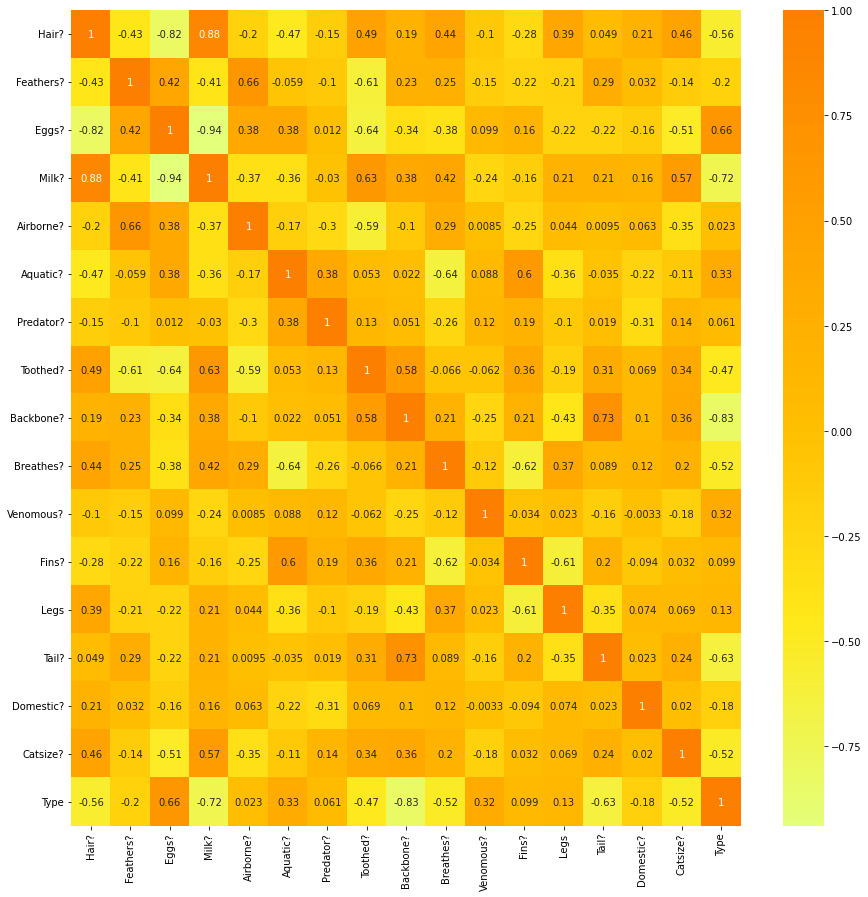

In [68]:
figura = plt.figure(figsize=(15,15))
sns.heatmap(zoo_data.corr(), cmap="Wistia", annot=True);

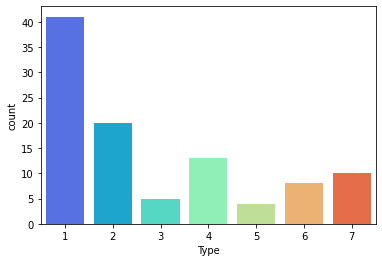

In [50]:
sns.countplot(data=zoo_data, x='Type', palette='rainbow')

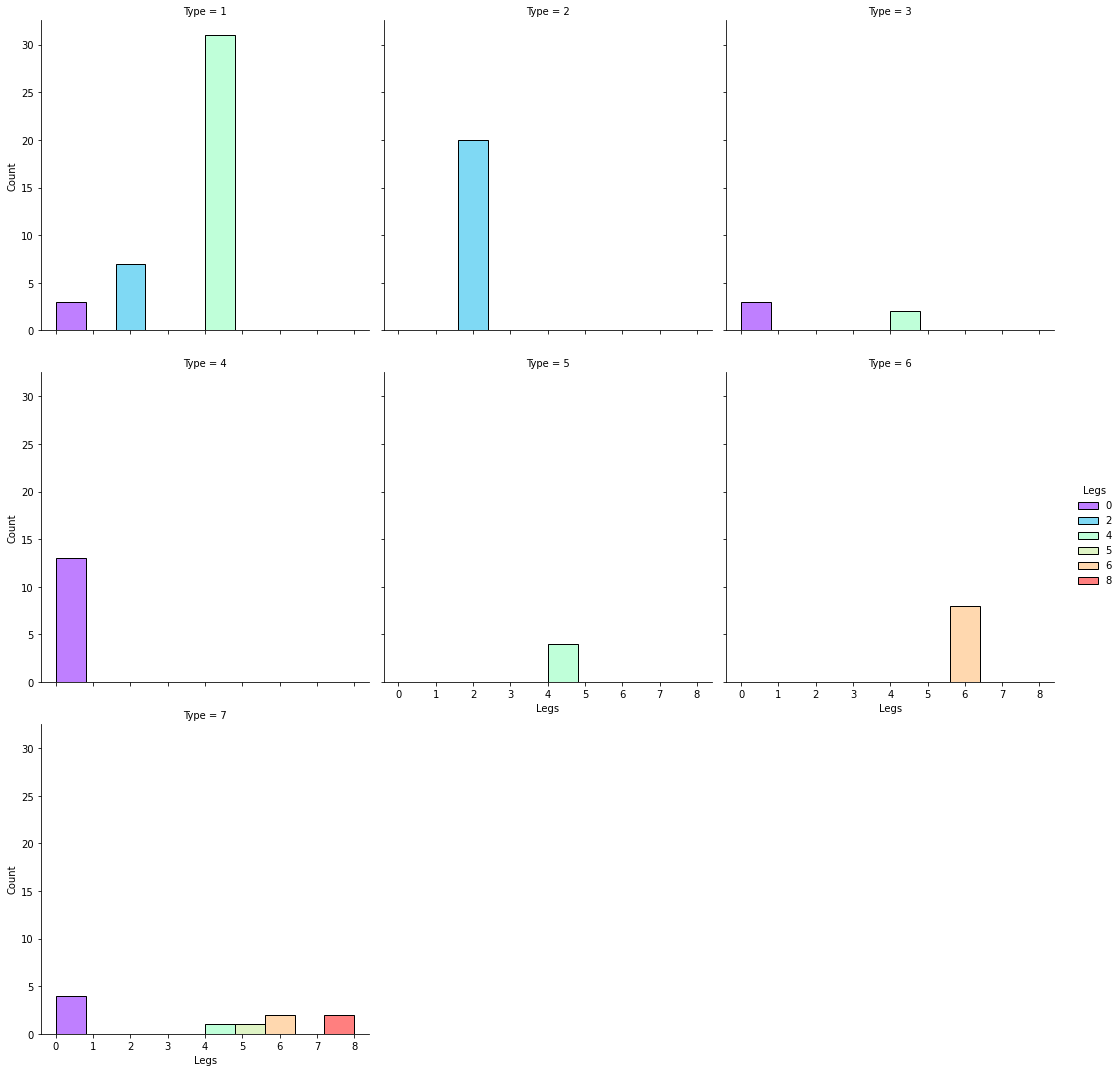

In [66]:
sns.displot(data=zoo_data, x='Legs', col='Type', kind='hist', hue='Legs', palette='rainbow', col_wrap=3)

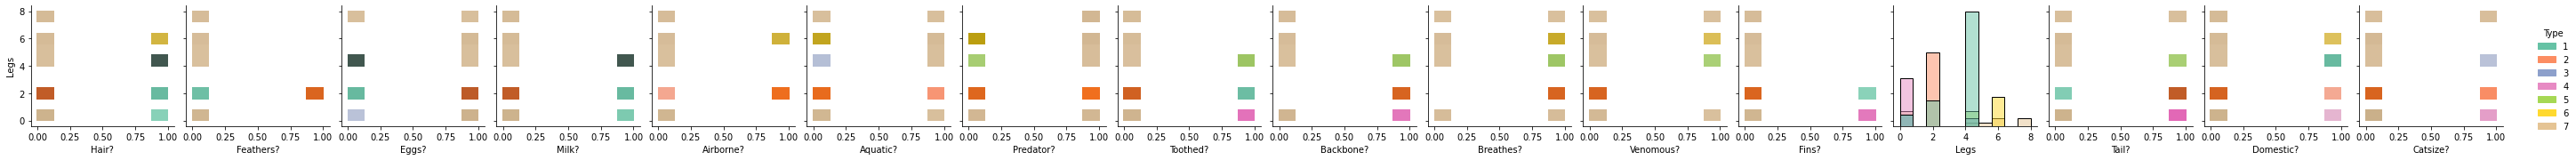

In [52]:
sns.pairplot(data=zoo_data, y_vars='Legs', hue='Type', kind='hist', palette='Set2')

# 3. Preparação dos Dados

- X = Tudo menos 'Animal Name' e 'Type'
- Y = Somente a coluna 'Type'

In [53]:
zoo_data.columns

Index(['Animal Name', 'Hair?', 'Feathers?', 'Eggs?', 'Milk?', 'Airborne?',
       'Aquatic?', 'Predator?', 'Toothed?', 'Backbone?', 'Breathes?',
       'Venomous?', 'Fins?', 'Legs', 'Tail?', 'Domestic?', 'Catsize?', 'Type'],
      dtype='object')

In [54]:
x_zoo = zoo_data.drop(columns=['Animal Name', 'Type']).values
print(x_zoo)
x_zoo[0]

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]]


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 4, 0, 0, 1])

In [55]:
y_zoo = zoo_data['Type'].values
y_zoo

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [56]:
# Mesma quantidade de linhas, x com 16 colunas e y com apenas 1
x_zoo.shape, y_zoo.shape

((101, 16), (101,))

# 4. Aplicação do modelo escolhido - Regressão Logística

## Dividir as bases entre variáveis x e y de treino e teste

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_zoo, y_zoo, test_size=0.3, random_state=0)

In [58]:
x_train.shape, y_train.shape

((70, 16), (70,))

In [59]:
x_test.shape, y_test.shape

((31, 16), (31,))

## Treinando e Prevendo

In [60]:
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [61]:
predict_logistic_regression = model_logistic_regression.predict(x_test)

percentage_logistic_regression = metrics.r2_score(y_test, predict_logistic_regression)
print("Logistic Regression:", percentage_logistic_regression)

Linear Regression: 0.9909250585480094


# 5. Apresentação dos resultados

In [62]:
aux_table = pd.DataFrame()
aux_table['Y Test'] = y_test
aux_table['Logistic Regression'] = predict_logistic_regression

## Comparando em gráfico de linha: Teste vs Regressão Logística

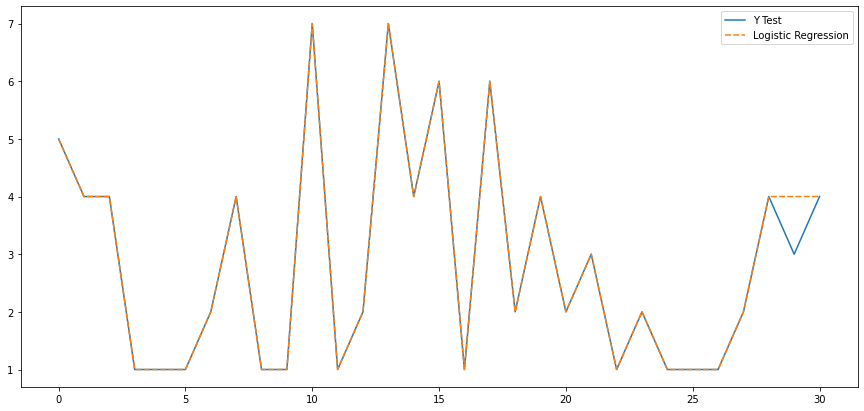

In [63]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=aux_table)
plt.show()

## Resultado da Tabela de Classificação

In [64]:
print(classification_report(y_test, predict_logistic_regression))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       1.00      0.50      0.67         2
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.97        31
   macro avg       0.98      0.93      0.94        31
weighted avg       0.97      0.97      0.96        31



## Resultado da Matriz de confusão


 Matriz de Confusão, sem normalização
[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]

 Normalizada
[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


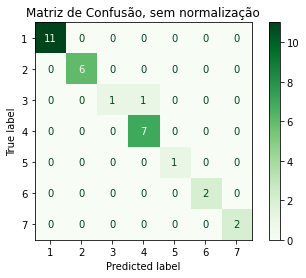

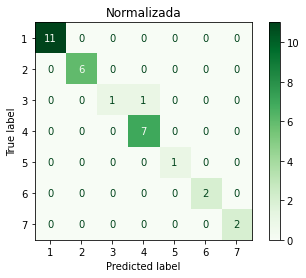

In [65]:
cm = confusion_matrix(y_test, predict_logistic_regression)
cm_params = [("Matriz de Confusão, sem normalização", None), ("Normalizada", 'true')]

for title, normalize in cm_params:
  disp = ConfusionMatrixDisplay.from_predictions(y_test, predict_logistic_regression, cmap=plt.cm.Greens)
  disp.ax_.set_title(title)

  print('\n', title)
  print(disp.confusion_matrix)